For the adventurous ML can be used with other methods that can find similar results.. they can be hard to interpret, but sometimes new features can be seen from different clustering methods

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import shapiro, anderson, norm

import umap as U

In [2]:
df = pd.read_excel(r'/Users/s/datasets/banana-gc-matrix.xlsx', header=0)

In [3]:
# Drop last 7 columns as they are empty (NaN)
df = df.dropna(axis=1, how='any')
df = df.set_index('Unnamed: 0')

In [4]:

print(df)


                      (2E  6Z)-nona-2  6-dienal Area  \
Unnamed: 0                                             
Green_Banana_1     364006         302         138924   
Ripe_Banana_3      164244       14646          16896   
Overripe_Banana_2   32980        2007           4662   
Green_Banana_4     190016        1144         146320   
Ripe_Banana_5      122107       24359          15625   
Overripe_Banana_1   55995        2127           4160   
Ripe_Banana_2      118401       14523           3133   
Green_Banana_3      53522        1206          53191   
Overripe_Banana_3   32269        2826           6716   
Green_Banana_2      68455         966          99780   
Overripe_Banana_4   20137        2470          10243   
Ripe_Banana_1      142991       12780           5120   

                   (3Z)-3-Hexenyl acetate Area  (E)-2-Nonenal Area  \
Unnamed: 0                                                           
Green_Banana_1                            1186               11345   
Ripe_

PICK ONE OF THE TWO BELOW, they look like the same output but one is log transformed. I'll leave it like this for now as there may be other transformations required in the future but for now with biological dataset most things will probably log10 transform as standard.

Let's see how this Metabolite dataset looks without log transforming the dataset

Explained Variance for each Principal Component:
[36.09510938 30.60953159  4.21398323]

Explained Variance Ratio for each Principal Component:
[0.46216529 0.39192742 0.05395625]


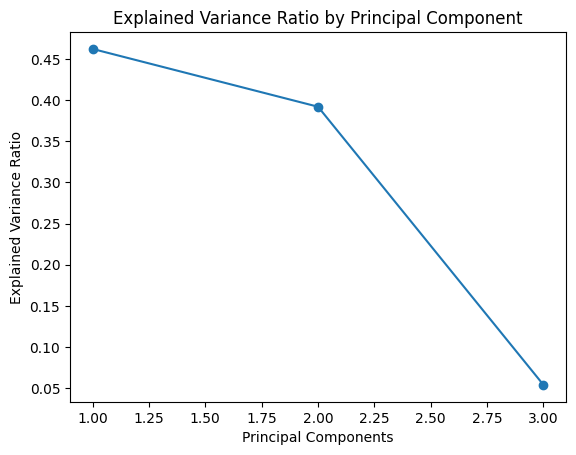

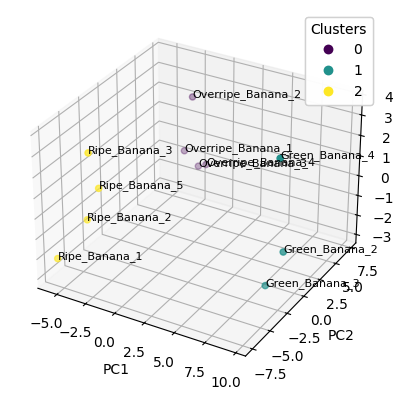

In [14]:
num_df = np.delete(df, 0, 0)

scaler= StandardScaler()
scaled_data = scaler.fit_transform(num_df)

#Principal Component Analysis
pca = PCA(n_components =3)
pca_result = pca.fit_transform(scaled_data)

# Explained Variance and Explained Variance Ratio
print("Explained Variance for each Principal Component:")
print(pca.explained_variance_)

print("\nExplained Variance Ratio for each Principal Component:")
print(pca.explained_variance_ratio_)

# Plot explained variance and its ratio
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

#Create a dataframe to do the next part  
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters as needed
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])

# Use index from log_df or df for labelling
pca_df['Label'] = df.index[-len(pca_df):]

# 3D plot of the PCA results colored by the cluster labels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis')

#Add labels to the points (use 'Label' column from pca_df)
for i, txt in enumerate(pca_df['Label']):
    ax.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['PC3'][i], str(txt), size=8, color='black')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


This is with log transform as in the orgiinal version of this code.

Explained Variance for each Principal Component:
[45.28938997 23.83025309  3.43314104]

Explained Variance Ratio for each Principal Component:
[0.57988976 0.30512488 0.04395827]


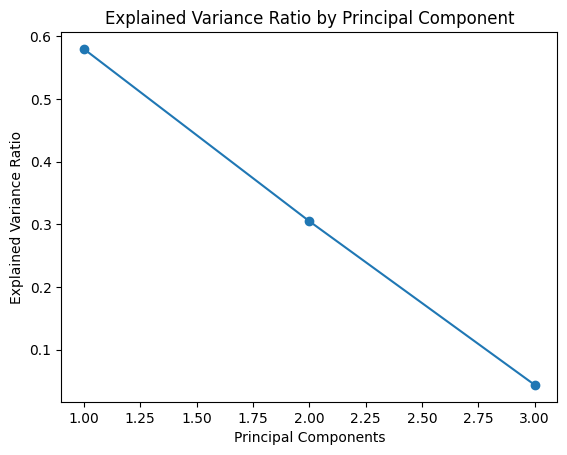

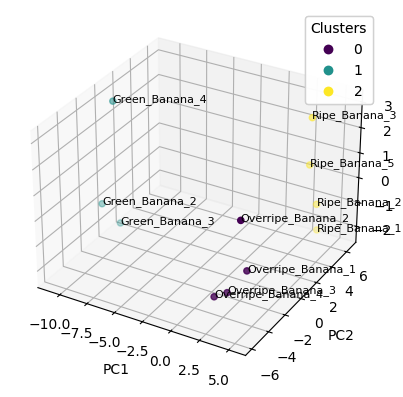

In [5]:
num_df = np.delete(df, 0, 0)
num_df = np.log10(num_df)

scaler= StandardScaler()
scaled_data = scaler.fit_transform(num_df)

#Principal Component Analysis
pca = PCA(n_components =3)
pca_result = pca.fit_transform(scaled_data)

# Explained Variance and Explained Variance Ratio
print("Explained Variance for each Principal Component:")
print(pca.explained_variance_)

print("\nExplained Variance Ratio for each Principal Component:")
print(pca.explained_variance_ratio_)

# Plot explained variance and its ratio
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

#Create a dataframe to do the next part  
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters as needed
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])

# Use index from log_df or df for labelling
pca_df['Label'] = df.index[-len(pca_df):]

# 3D plot of the PCA results colored by the cluster labels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis')

#Add labels to the points (use 'Label' column from pca_df)
for i, txt in enumerate(pca_df['Label']):
    ax.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['PC3'][i], str(txt), size=8, color='black')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


What we can see above is that log transforming increases 1st component explained variance but decreased the 2nd. 

Let's try ICA

Since PCA showed that the 1st 2 dimensions explained most of the variance, we visualize in 2d, since clusters are clear 

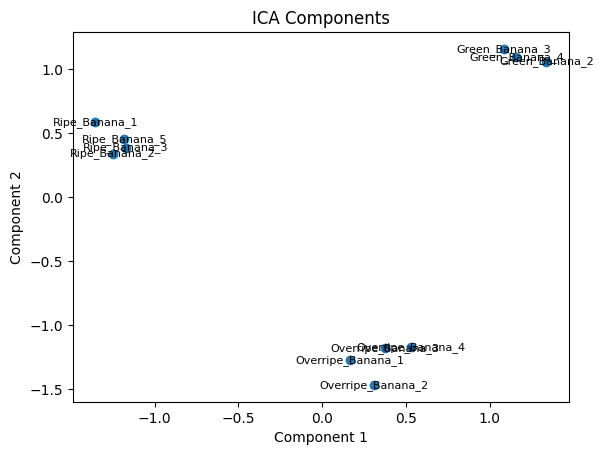

In [6]:
#apply ICA
ica = FastICA (n_components =2) # you can change hyperparameter here.
ica_result = ica.fit_transform(scaled_data)
ica_df = pd.DataFrame(ica_result, columns=['IC1', 'IC2'])
ica_df['Label'] = df.index[-len(ica_df):]
#visualize the results
plt.scatter(ica_result[:,0], ica_result[:,1])#, c='blue', edgecolor='k', alpha=0.7)


# Add index labels to the points
for i, txt in enumerate(ica_df['Label']):
    plt.text(ica_df['IC1'][i], ica_df['IC2'][i], str(txt), size=8, color='black', ha='center', va='center')

plt.title('ICA Components')
plt.xlabel ('Component 1')
plt.ylabel ('Component 2')
plt.show()

In [27]:
print(ica_df)

         IC1       IC2              Label
0  -0.337066 -1.188372      Ripe_Banana_3
1   1.450452  0.369932  Overripe_Banana_2
2  -1.143078  1.109620     Green_Banana_4
3  -0.401593 -1.199273      Ripe_Banana_5
4   1.261488  0.218500  Overripe_Banana_1
5  -0.288177 -1.261941      Ripe_Banana_2
6  -1.204527  1.031435     Green_Banana_3
7   1.161606  0.425203  Overripe_Banana_3
8  -1.114856  1.290209     Green_Banana_2
9   1.146797  0.581019  Overripe_Banana_4
10 -0.531047 -1.376333      Ripe_Banana_1


And uMap

/Users/s/PhD/gitrepo/EnzymeKineticGPR/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/s/PhD/gitrepo/EnzymeKineticGPR/venv/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


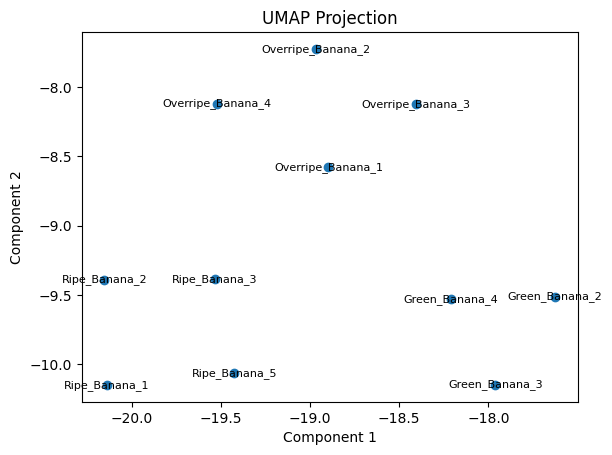

In [ ]:
#Apply UMAP
umap_model = U.UMAP(n_components = 2, n_neighbors = 15, min_dist = .1) #2, 15, .1 are the default parameters
umap_result = umap_model.fit_transform(scaled_data)
umap_df = pd.DataFrame(umap_result, columns=['d1', 'd2'])
umap_df['Label'] = df.index[-len(umap_df):]


#visualize the results

plt.scatter(umap_result[:,0], umap_result[:,1])
# Add index labels to the points
for i, txt in enumerate(umap_df['Label']):
    plt.text(umap_df['d1'][i], umap_df['d2'][i], str(txt), size=8, color='black', ha='center', va='center')



plt.title('UMAP Projection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

You can mess with the variables in umap here lowering n_neighbours will create the triple clusters we've been seeing as before

/Users/s/PhD/gitrepo/EnzymeKineticGPR/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


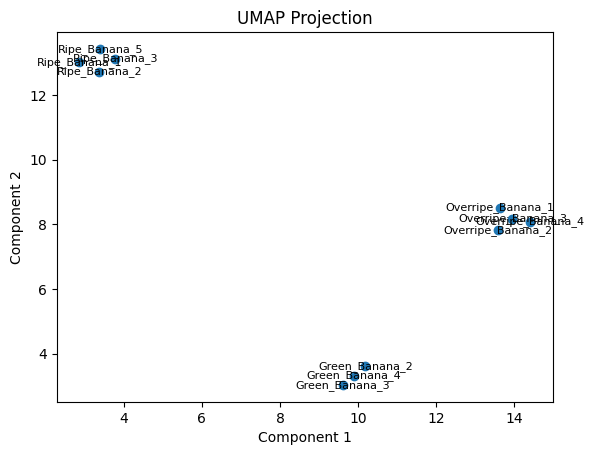

In [26]:
#Apply UMAP
umap_model = U.UMAP(n_components = 2, n_neighbors = 3, min_dist = 0.1)
umap_result = umap_model.fit_transform(scaled_data)
umap_df = pd.DataFrame(umap_result, columns=['d1', 'd2'])
umap_df['Label'] = df.index[-len(umap_df):]


#visualize the results

plt.scatter(umap_result[:,0], umap_result[:,1])
# Add index labels to the points
for i, txt in enumerate(umap_df['Label']):
    plt.text(umap_df['d1'][i], umap_df['d2'][i], str(txt), size=8, color='black', ha='center', va='center')



plt.title('UMAP Projection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()